In [1]:
import os as Zamzama
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import lasio

In [2]:
las2= lasio.read(r'Zamzama-02_logs.las')
las3= lasio.read(r'Zamzama-03_logs.las')
las5= lasio.read(r'Zamzama-05_logs.las')
las6= lasio.read(r'Zamzama-06_logs.las')
las8= lasio.read(r'Zamzama-8 ST-2_logs.las')

In [3]:
df2=las2.df()
df3=las3.df()
df5=las5.df()
df6=las6.df()
df8=las8.df()

In [4]:
columns_8={'GR': 'GR','NPHI':'NPHI','DT':'DT','UNKNOWN:1':'PHIE','UNKNOWN:2':'PHIT','SDT':'SDT',
           'UNKNOWN:3':'SW','UNKNOWN:4':'VCALC','UNKNOWN:5':'VCL','UNKNOWN:6':'VQTZ',
           'RHOB':'RHOB'}
df8=df8.rename(columns=columns_8)
df8=df8.reset_index()
columns_2={'GR': 'GR','DT':'DT','UNKNOWN:1':'PHIE','UNKNOWN:2':'PHIT','SDT':'SDT',
           'UNKNOWN:3':'SW','UNKNOWN:4':'VCALC','UNKNOWN:5':'VCL','UNKNOWN:6':'VQTZ',
           'RHOB':'RHOB'}
df2=df2.rename(columns=columns_2)
df2=df2.reset_index()
columns_3={'GR': 'GR','DT':'DT','UNKNOWN:1':'PHIE','UNKNOWN:2':'PHIT','SDT':'SDT',
           'UNKNOWN:3':'SW','UNKNOWN:4':'VQTZ','UNKNOWN:5':'VCL','RHOB':'RHOB'}
df3=df3.rename(columns=columns_3)
df3=df3.reset_index()
columns_5={'GR': 'GR','DT':'DT','UNKNOWN:1':'PHIE','UNKNOWN:2':'PHIT','SDT':'SDT',
           'UNKNOWN:3':'VCALC','UNKNOWN:4':'VQTZ','UNKNOWN:5':'VCL','RHOB':'RHOB'}
df5=df5.rename(columns=columns_5)
df5=df5.reset_index()
columns_6={'GR': 'GR','DT':'DT','UNKNOWN:1':'PHIE','UNKNOWN:2':'PHIT',
           'UNKNOWN:3':'SW','UNKNOWN:4':'VCALC','UNKNOWN:5':'VCL','UNKNOWN:6':'VQTZ','RHOB':'RHOB'}
df6=df6.rename(columns=columns_6)
df6=df6.reset_index()

In [5]:
df2=df2[df2["DEPTH"].between(3454,3678,inclusive=True)]
df3=df3[df3["DEPTH"].between(3753.5,3975.5,inclusive=True)]
df5=df5[df5["DEPTH"].between(3592.3,3809.9,inclusive=True)]
df6=df6[df6["DEPTH"].between(3527,3750,inclusive=True)]
df8=df8[df8["DEPTH"].between(3568.88,3757,inclusive=True)]

In [6]:
df2=df2.reset_index(drop="True")
df3=df3.reset_index(drop="True")
df5=df5.reset_index(drop="True")
df6=df6.reset_index(drop="True")
df8=df8.reset_index(drop="True")

In [7]:
df2=df2[["DEPTH","VCL","PHIT","SW"]]
df3=df3[["DEPTH","VCL","PHIT","SW"]]
df6=df6[["DEPTH","VCL","PHIT","SW"]]
df8=df8[["DEPTH","VCL","PHIT","SW"]]

In [8]:
df2=df2.dropna(how='any')
df2 = df2.reset_index(drop=True)
df3=df3.dropna(how='any')
df3 = df3.reset_index(drop=True)
df5=df5.dropna(how='any')
df5 = df5.reset_index(drop=True)
df6=df6.dropna(how='any')
df6 = df6.reset_index(drop=True)
df8=df8.dropna(how='any')
df8 = df8.reset_index(drop=True)

In [9]:
df2.describe()

,DEPTH,VCL,PHIT,SW
count,1469.000000,1469.000000,1469.000000,1469.000000
mean,3566.007200,0.153576,0.074800,0.536111
std,64.649312,0.144778,0.030167,0.392138
min,3454.145500,0.000000,0.022600,0.060900
25%,3510.076400,0.046400,0.051300,0.139500
50%,3566.007100,0.103600,0.069200,0.420100
75%,3621.938000,0.222200,0.095400,1.000000
max,3677.868900,0.959000,0.167300,1.000000


In [10]:
sand_cutoff = 0.30
wet_sand = ((df2.VCL <= sand_cutoff) & (df2.SW >= 0.45))
gas_sand = ((df2.VCL <= sand_cutoff) & (df2.SW < 0.45))
shale = (df2.VCL > sand_cutoff)

In [11]:
temp_lfc = np.zeros(np.shape(df2.VCL))
temp_lfc[wet_sand.values] = 1    # LFC will be 1 when ssb (brine sand flag) is True
temp_lfc[gas_sand.values] = 2      # LFC will be 2 when sso (oil sand flag) is True
temp_lfc[shale.values] = 3         # LFC will be 3 when sh (shale flag) is True
df2['LFC'] = temp_lfc             # Copy the temporary log temp_lfc into the DataFrame with name `LFC`

df2.to_csv('qsiwell2_lfc.csv',index=False) # save the data for use in Part 2

In [12]:
np.shape(df2.DEPTH)

(1469,)

In [13]:
string = "wet sst={0}, gas sst={1}, shale={2}"
data = (np.count_nonzero(wet_sand),
        np.count_nonzero(gas_sand),
        np.count_nonzero(shale))
print(string.format(*data))

wet sst=449, gas sst=750, shale=270


In [14]:
print("LFC min: {0}, LFC max: {1}".format(df2.LFC.min(), df2.LFC.max()))

LFC min: 1.0, LFC max: 3.0


In [15]:
import matplotlib.colors as colors
#      0=undef   1=bri  2=oil   3=gas 4=shale
ccc = ['blue','red','green']
cmap_facies = colors.ListedColormap(ccc[0:len(ccc)], 'indexed')

In [16]:
ccc1 = ['blue','green','red']
cmap_facies1 = colors.ListedColormap(ccc1[0:len(ccc1)], 'indexed')

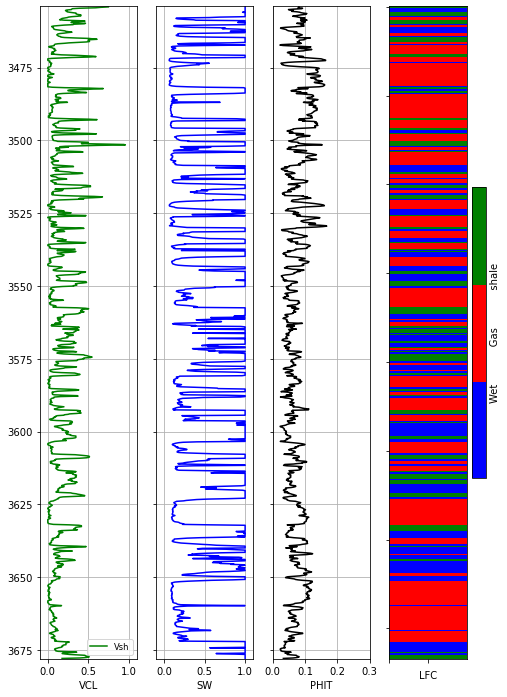

In [17]:
ztop=3454; zbot=3678 
ll=df2

cluster=np.repeat(np.expand_dims(ll['LFC'].values,1), 100, 1)

f, ax = plt.subplots(nrows=1, ncols=4, figsize=(8, 12))
ax[0].plot(ll.VCL, ll.DEPTH, '-g', label='Vsh')
ax[1].plot(ll.SW, ll.DEPTH, '-b', label='Sw')
ax[2].plot(ll.PHIT, ll.DEPTH, '-k', label='phi')
im=ax[3].imshow(cluster, interpolation='none', aspect='auto',cmap=cmap_facies,vmin=1,vmax=3)

cbar=plt.colorbar(im, ax=ax[3])
# cbar.set_label('0=undef,1=brine,2=oil,3=gas,4=shale')
# cbar.set_ticks(range(0,4+1)); cbar.set_ticklabels(range(0,4+1))
cbar.set_label((12*' ').join(['Wet', 'Gas','shale']))
cbar.set_ticks(range(0,1)); cbar.set_ticklabels('')

for i in range(len(ax)-1):
    ax[i].set_ylim(ztop,zbot)
    ax[i].invert_yaxis()
    ax[i].grid()
    ax[i].locator_params(axis='x', nbins=4)
ax[0].legend(fontsize='small', loc='lower right')
ax[0].set_xlabel("VCL"),    ax[0].set_xlim(-.1,1.1)
ax[1].set_xlabel("SW"), ax[1].set_xlim(-.1,1.1)
ax[2].set_xlabel("PHIT"),         ax[2].set_xlim(0,0.3)
ax[3].set_xlabel('LFC')
ax[1].set_yticklabels([]); ax[2].set_yticklabels([]); ax[3].set_yticklabels([]); ax[3].set_xticklabels([])
plt.savefig("log.png", dpi=250)


In [18]:
df2.LFC.value_counts()

2.0    750
1.0    449
3.0    270
Name: LFC, dtype: int64

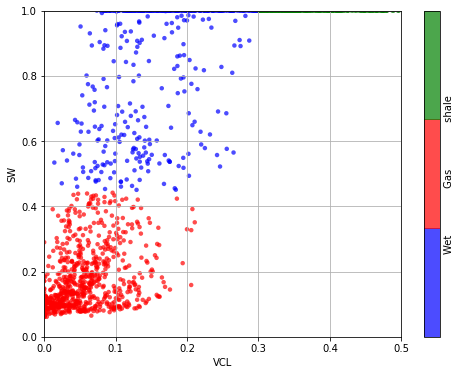

In [19]:
plt.figure(figsize=(8,6))

plt.scatter(df2.VCL, df2.SW,20, c=df2.LFC,
            marker='o', edgecolors='none',
            alpha=0.7, cmap=cmap_facies,
            vmin=1, vmax=3)
plt.xlim(0, 0.5); plt.ylim(0, 1);
plt.xlabel('VCL'); plt.ylabel('SW')
plt.grid();

cbar = plt.colorbar()
cbar.set_label((15*' ').join(['Wet', 'Gas','shale']))
cbar.set_ticks(range(0,1)); cbar.set_ticklabels('')

In [20]:
df2.dtypes

DEPTH    float64
VCL      float64
PHIT     float64
SW       float64
LFC      float64
dtype: object

In [21]:
df2.isnull().sum()

DEPTH    0
VCL      0
PHIT     0
SW       0
LFC      0
dtype: int64

In [22]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn import metrics
from scipy.spatial.distance import cdist
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [23]:
df2.isnull().any()

DEPTH    False
VCL      False
PHIT     False
SW       False
LFC      False
dtype: bool

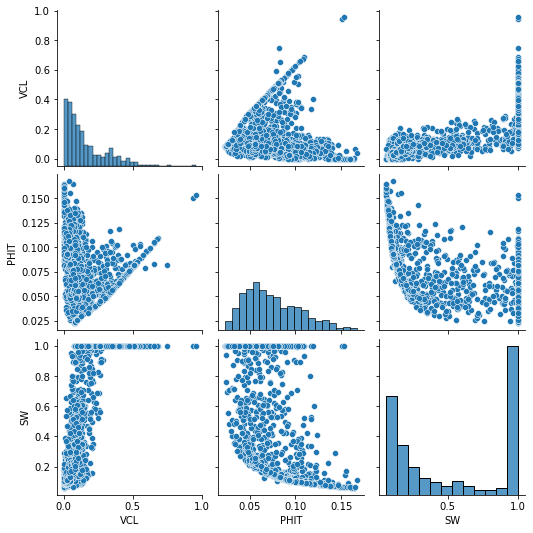

In [24]:
sns.pairplot(df2.drop(["LFC","DEPTH"], axis=1));

In [25]:
features_clust = df2.drop(["LFC","DEPTH"], axis=1)
features_clust.head()

,VCL,PHIT,SW
0,0.7494,0.0816,1.0
1,0.6529,0.0827,1.0
2,0.5924,0.0785,1.0
3,0.3921,0.0926,1.0
4,0.3052,0.0904,1.0


In [26]:
scaler = preprocessing.StandardScaler().fit(features_clust)
scaled_clust = scaler.transform(features_clust)

<ipython-input-27-3842fee4419b>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  pd.DataFrame(scaled_clust).hist(ax=ax)


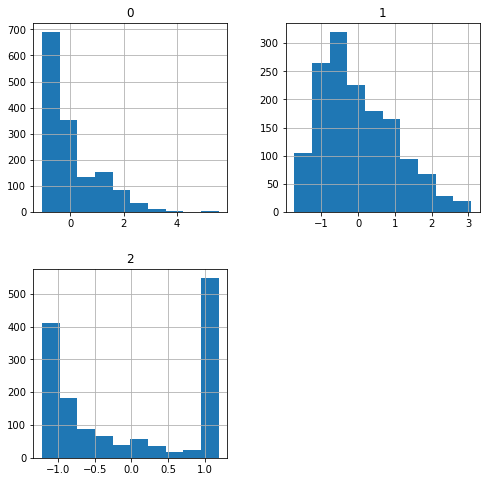

In [27]:
fig = plt.figure(figsize = (8,8))
ax = fig.gca()
pd.DataFrame(scaled_clust).hist(ax=ax)
plt.show()

In [28]:
clust_kmeans = KMeans(n_clusters=3, init='k-means++')
clust_kmeans.fit(scaled_clust)

KMeans(n_clusters=3)

In [29]:
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',random_state=None, tol=0.0001, verbose=0)

KMeans(n_clusters=3, n_jobs=None, precompute_distances='auto')

In [30]:
clust_labels = clust_kmeans.labels_

In [31]:
clust_labels.shape

(1469,)

In [32]:
clust_labels[0:100]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 2, 0, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 2,
       2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2])

In [33]:
df2['ClusterLabels']=clust_labels
df2.head()

,DEPTH,VCL,PHIT,SW,LFC,ClusterLabels
0,3454.1455,0.7494,0.0816,1.0,3.0,1
1,3454.2981,0.6529,0.0827,1.0,3.0,1
2,3454.4504,0.5924,0.0785,1.0,3.0,1
3,3454.6028,0.3921,0.0926,1.0,3.0,1
4,3454.7551,0.3052,0.0904,1.0,3.0,1


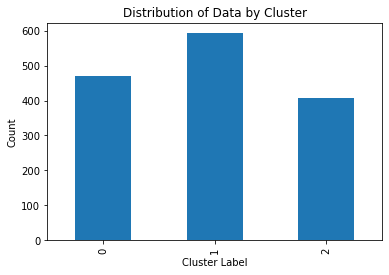

In [34]:
cluster_counts = df2['ClusterLabels'].value_counts().sort_index()
cluster_counts.plot(kind='bar',title='Distribution of Data by Cluster')
plt.xlabel('Cluster Label')
plt.ylabel('Count');

In [35]:
df2.ClusterLabels.value_counts()

1    592
0    471
2    406
Name: ClusterLabels, dtype: int64

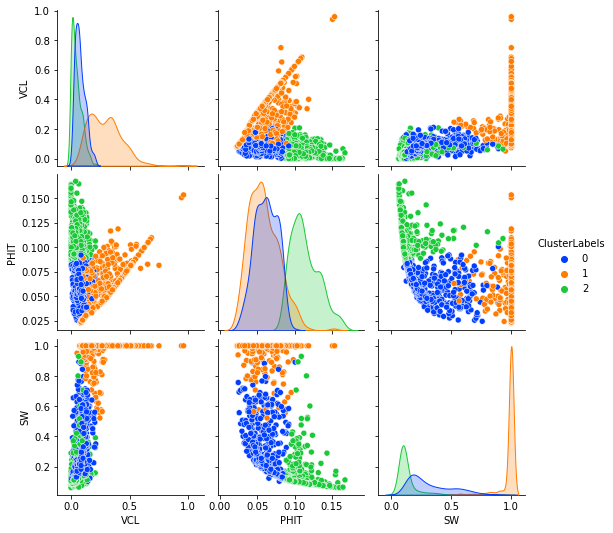

In [36]:
sns.pairplot(df2.drop(["LFC","DEPTH"], axis=1), hue='ClusterLabels', palette='bright');

In [37]:
facies = df2['LFC']
clusters = df2['ClusterLabels']

In [38]:
from sklearn.metrics import completeness_score, homogeneity_score

In [39]:
print('Completeness score: ', completeness_score(facies,clusters))

Completeness score:  0.4871194555659009


In [40]:
print('Homogeneity score: ', homogeneity_score(facies,clusters))

Homogeneity score:  0.5204238727961


In [41]:
def compare_clusters_plot(logs):
    #make sure logs are sorted by depth
    logs = df2.sort_values(by='DEPTH')
    
    ztop=logs.DEPTH.min(); zbot=logs.DEPTH.max()
    
    cluster1 = np.repeat(np.expand_dims(logs['LFC'].values,1), 100, 1)
    cluster2 = np.repeat(np.expand_dims(logs['ClusterLabels'].values,1), 100, 1)
    
    f, ax = plt.subplots(nrows=1, ncols=5, figsize=(9, 12))
    ax[0].plot(logs.VCL, logs.DEPTH, '-g')
    ax[1].plot(logs.SW, logs.DEPTH, '-')
    ax[2].plot(logs.PHIT, logs.DEPTH, '-', color='0.5')
    im1 = ax[3].imshow(cluster1, interpolation='none', aspect='auto',vmin=1,vmax=3)
    im2 = ax[4].imshow(cluster2, interpolation='none', aspect='auto',vmin=1,vmax=3)
    
    for i in range(len(ax)-2):
        ax[i].set_ylim(ztop,zbot)
        ax[i].invert_yaxis()
        ax[i].grid()
        ax[i].locator_params(axis='x', nbins=3)
    
    ax[0].set_xlabel("VCL")
    ax[0].set_xlim(logs.VCL.min(),logs.VCL.max())
    ax[1].set_xlabel("SW")
    ax[1].set_xlim(logs.VCL.min(),VCL.max())
    ax[2].set_xlabel("PHIT")
    ax[2].set_xlim(logs.PHIT.min(),logs.PHIT.max())
    ax[3].set_xlabel('Facies')
    ax[4].set_xlabel('ClusterLabels')
    
    ax[1].set_yticklabels([]); ax[2].set_yticklabels([]); ax[3].set_yticklabels([])
    ax[4].set_yticklabels([]); ax[5].set_yticklabels([])
    ax[5].set_xticklabels([])
    ax[6].set_xticklabels([])
    f.suptitle('Well: %s'%logs.iloc[0]['Well Name'], fontsize=14,y=0.94)

In [42]:
# compare_clusters_plot(df2)

In [43]:
df2

,DEPTH,VCL,PHIT,SW,LFC,ClusterLabels
0,3454.1455,0.7494,0.0816,1.0,3.0,1
1,3454.2981,0.6529,0.0827,1.0,3.0,1
2,3454.4504,0.5924,0.0785,1.0,3.0,1
3,3454.6028,0.3921,0.0926,1.0,3.0,1
4,3454.7551,0.3052,0.0904,1.0,3.0,1
...,...,...,...,...,...,...
1464,3677.2593,0.5114,0.0818,1.0,3.0,1
1465,3677.4116,0.5088,0.0814,1.0,3.0,1
1466,3677.5640,0.4734,0.0757,1.0,3.0,1
1467,3677.7163,0.3985,0.0638,1.0,3.0,1


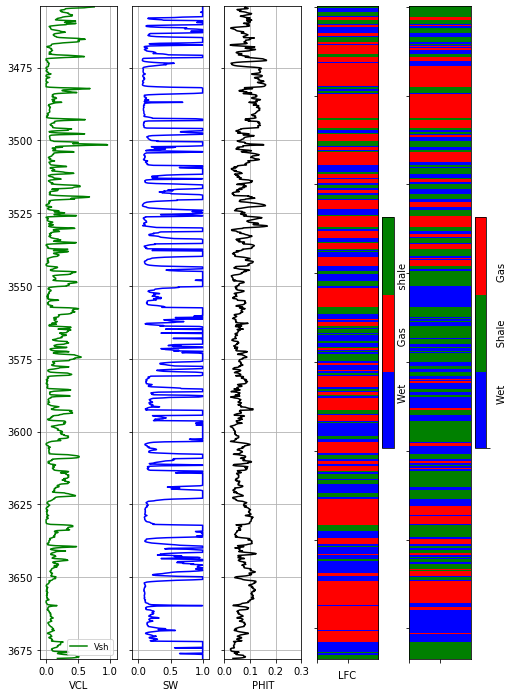

In [60]:
ztop=3454; zbot=3678 
ll=df2

cluster1=np.repeat(np.expand_dims(ll['LFC'].values,1), 100, 1)
cluster2 = np.repeat(np.expand_dims(ll['ClusterLabels'].values,1), 100, 1)

f, ax = plt.subplots(nrows=1, ncols=5, figsize=(8, 12))
ax[0].plot(ll.VCL, ll.DEPTH, '-g', label='Vsh')
ax[1].plot(ll.SW, ll.DEPTH, '-b', label='Sw')
ax[2].plot(ll.PHIT, ll.DEPTH, '-k', label='phi')
im=ax[3].imshow(cluster1, interpolation='none', aspect='auto',cmap=cmap_facies,vmin=1,vmax=3)
im1=ax[4].imshow(cluster2, interpolation='none', aspect='auto',cmap=cmap_facies1,vmin=0,vmax=2)

cbar=plt.colorbar(im, ax=ax[3])
cbar1=plt.colorbar(im1, ax=ax[4])
# cbar.set_label('0=undef,1=brine,2=oil,3=gas,4=shale')
# cbar.set_ticks(range(0,4+1)); cbar.set_ticklabels(range(0,4+1))
cbar.set_label((12*' ').join(['Wet', 'Gas','shale']))
cbar.set_ticks(range(0,1)); cbar.set_ticklabels('')

cbar1.set_label((12*' ').join(['Wet', 'Shale','Gas']))
cbar1.set_ticks(range(0,1)); cbar1.set_ticklabels('')

for i in range(len(ax)-2):
    ax[i].set_ylim(ztop,zbot)
    ax[i].invert_yaxis()
    ax[i].grid()
    ax[i].locator_params(axis='x', nbins=4)
    
ax[0].legend(fontsize='small', loc='lower right')
ax[0].set_xlabel("VCL"),    ax[0].set_xlim(-.1,1.1)
ax[1].set_xlabel("SW"), ax[1].set_xlim(-.1,1.1)
ax[2].set_xlabel("PHIT"),         ax[2].set_xlim(0,0.3)
ax[3].set_xlabel('LFC')
ax[1].set_yticklabels([]); ax[2].set_yticklabels([]); ax[3].set_yticklabels([]); ax[3].set_xticklabels([]); ax[4].set_yticklabels([]); ax[4].set_xticklabels([])
plt.savefig("log.png", dpi=250)